In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/krish/Desktop/Data Science Training/Dataset/heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Check shape and data types
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (1025, 14)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


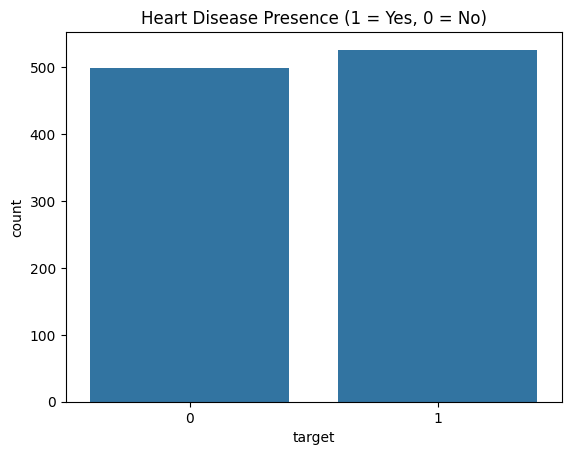

target
1    526
0    499
Name: count, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the target distribution
sns.countplot(data=df, x='target')
plt.title("Heart Disease Presence (1 = Yes, 0 = No)")
plt.show()

# Check class balance
df['target'].value_counts()


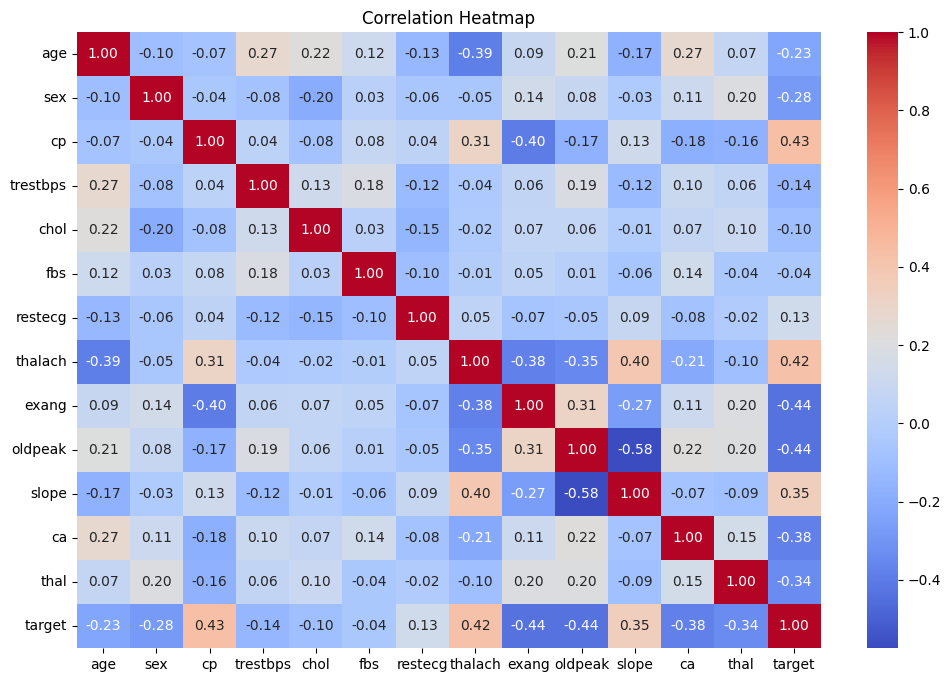

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
X = df.drop('target', axis=1)
y = df['target']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



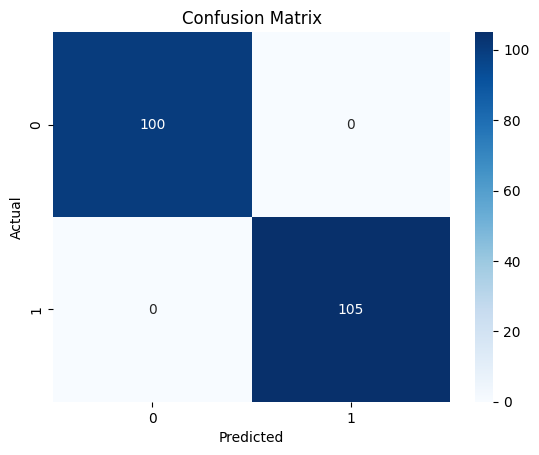

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict
y_pred = model.predict(X_test_scaled)

# Accuracy and Classification Report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
import numpy as np

# Example: predict on a new patient
new_patient = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
new_patient_scaled = scaler.transform(new_patient)
prediction = model.predict(new_patient_scaled)

print("Prediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")

Prediction: Heart Disease


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
import joblib

# Save the model
joblib.dump(model, 'heart_disease_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
